In [5]:
import numpy as np
import pandas as pd
import os
import glob
import shutil
import random
import matplotlib.pylab as plt
from PIL import Image
import cv2

os.path.join :  경로(패스)명 조작에 관한 처리를 모아둔 모듈로써 구현되어 있는 함수의 하나이다. 인수에 전달된 2개의 문자열을 결합하여, 1개의 경로로 할 수 있다.  -> img_path/train_set 경로 지정

os.mkdir : 폴더 생성 함수

##이미지 불러오고, 훈련 검증 테스트 폴더 만들기


In [6]:
#이미지 불러올 폴더
img_path = "./image_data"

# 훈련 폴더 생성하기
train_set = os.path.join(img_path,"train_set") 
os.mkdir(train_set)  
#검증 폴더 생성하기
val_set = os.path.join(img_path,"val_set")
os.mkdir(val_set)
#테스트 폴더 생성하기
test_set = os.path.join(img_path,"test_set")
os.mkdir(test_set)

##가위바위보 각각 훈련, 검증, 테스트 폴더 만들기

In [7]:
#훈련용 가위바위보 경로
train_rock = os.path.join(train_set,"rock")
os.mkdir(train_rock)

train_sciss = os.path.join(train_set,"sciss")
os.mkdir(train_sciss)

train_paper = os.path.join(train_set,"paper")
os.mkdir(train_paper)

#검증용 가위바위보 경로
val_rock = os.path.join(val_set,"rock")
os.mkdir(val_rock)

val_sciss = os.path.join(val_set,"sciss")
os.mkdir(val_sciss)

val_paper = os.path.join(val_set,"paper")
os.mkdir(val_paper)

#테스트용 가위바위보 경로
test_rock = os.path.join(test_set,"rock")
os.mkdir(test_rock)

test_sciss = os.path.join(test_set,"sciss")
os.mkdir(test_sciss)

test_paper = os.path.join(test_set,"paper")
os.mkdir(test_paper)

##이미지를 각 폴더로 옮기기
각 300,100,100 장의 이미지를 배열에 담고, 반복문을 통해 src를 dst에 복사



*   **shutil 모듈이란?** 파일과 파일 모음에 대한 여러 가지 고수준 연산을 제공합니다. 특히, 파일 복사와 삭제를 지원하는 함수가 제공

*   **shutil.copyfile이란?** 가능한 가장 효율적인 방법으로 이름이 src 인 파일의 내용을 (메타 데이터 없이) 이름이 dst 인 파일에 복사하고 dst를 반환합니다. src와 dst는 경로류 객체나 문자열로 지정된 경로 이름입니다.


참고 : https://docs.python.org/ko/3/library/shutil.html



In [8]:
#가위이미지 옮기기
orgin_dir = "./drive/MyDrive/image_data/sciss"
fnames = ['sci_img ({}).jpg'.format(i+1) for i in range(300)]
for fname in fnames:
    src = os.path.join(orgin_dir,fname)
    dst = os.path.join(train_sciss,fname)
    shutil.copyfile(src,dst)
    

fnames = ['sci_img ({}).jpg'.format(i+1) for i in range(300, 400)]
for fname in fnames:
    src = os.path.join(orgin_dir,fname)
    dst = os.path.join(val_sciss,fname)
    shutil.copyfile(src,dst)
    
fnames = ['sci_img ({}).jpg'.format(i+1) for i in range(400, 500)]
for fname in fnames:
    src = os.path.join(orgin_dir,fname)
    dst = os.path.join(test_sciss,fname)
    shutil.copyfile(src,dst)
    

In [9]:
#바위이미지 옮기기
orgin_dir = "./drive/MyDrive/image_data/rock"
fnames = ['rock_img ({}).jpg'.format(i+1) for i in range(300)]
for fname in fnames:
    src = os.path.join(orgin_dir,fname)
    dst = os.path.join(train_rock,fname)
    shutil.copyfile(src,dst)
    

fnames = ['rock_img ({}).jpg'.format(i+1) for i in range(300, 400)]
for fname in fnames:
    src = os.path.join(orgin_dir,fname)
    dst = os.path.join(val_rock,fname)
    shutil.copyfile(src,dst)
    
fnames = ['rock_img ({}).jpg'.format(i+1) for i in range(400, 500)]
for fname in fnames:
    src = os.path.join(orgin_dir,fname)
    dst = os.path.join(test_rock,fname)
    shutil.copyfile(src,dst)
    

In [10]:
#보 이미지 옮기기
orgin_dir = "./drive/MyDrive/image_data/paper"
fnames = ['paper_img ({}).jpg'.format(i+1) for i in range(300)]
for fname in fnames:
    src = os.path.join(orgin_dir,fname)
    dst = os.path.join(train_paper,fname)
    shutil.copyfile(src,dst)
    

fnames = ['paper_img ({}).JPG'.format(i+1) for i in range(300, 361)]
for fname in fnames:
    src = os.path.join(orgin_dir,fname)
    dst = os.path.join(val_paper,fname)
    shutil.copyfile(src,dst)

fnames = ['paper_img ({}).jpg'.format(i+1) for i in range(361, 400)]
for fname in fnames:
    src = os.path.join(orgin_dir,fname)
    dst = os.path.join(val_paper,fname)
    shutil.copyfile(src,dst)
    
fnames = ['paper_img ({}).jpg'.format(i+1) for i in range(400, 500)]
for fname in fnames:
    src = os.path.join(orgin_dir,fname)
    dst = os.path.join(test_paper,fname)
    shutil.copyfile(src,dst)

#모델 구성하기


In [12]:

from keras import layers
from keras import models
from keras import regularizers
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from matplotlib import gridspec



#모델 층 구성


*   2차원 컨브넷 층과 MaxPooling 층으로 쌓고 Flatten 층으로 마친다.
*   드롭아웃 층과 분류와 회귀를 위한 Dense 층을 마지막에 추가하였다.




In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = "relu" ,
                        input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = "relu",kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation = "relu",kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation = "relu",kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(3,activation="softmax"))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

#모델 COMPILE


*   사용한 옵티마이저 : RMSprop
*   사용한 손실함수 : categorical_crossentropy



In [14]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss="categorical_crossentropy",
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


#이미지 증식

In [15]:
train_dgen = ImageDataGenerator(rescale = 1./255,rotation_range=15,
                                  width_shift_range=0.1,height_shift_range=0.1,
                                  shear_range=0.5, zoom_range=[0.8, 2.0],
                                  horizontal_flip=True, vertical_flip=True, fill_mode='nearest')

test_dgen = ImageDataGenerator(rescale=1./255)

train_gen = train_dgen.flow_from_directory(
    "./image_data/train_set",
    target_size =(150,150),
    batch_size = 30,
    class_mode = 'categorical'
)

val_gen = test_dgen.flow_from_directory(
    "./image_data/val_set",
    target_size =(150,150),
    batch_size = 30,
    class_mode = 'categorical'
)

Found 900 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


#증식된 이미지 확인

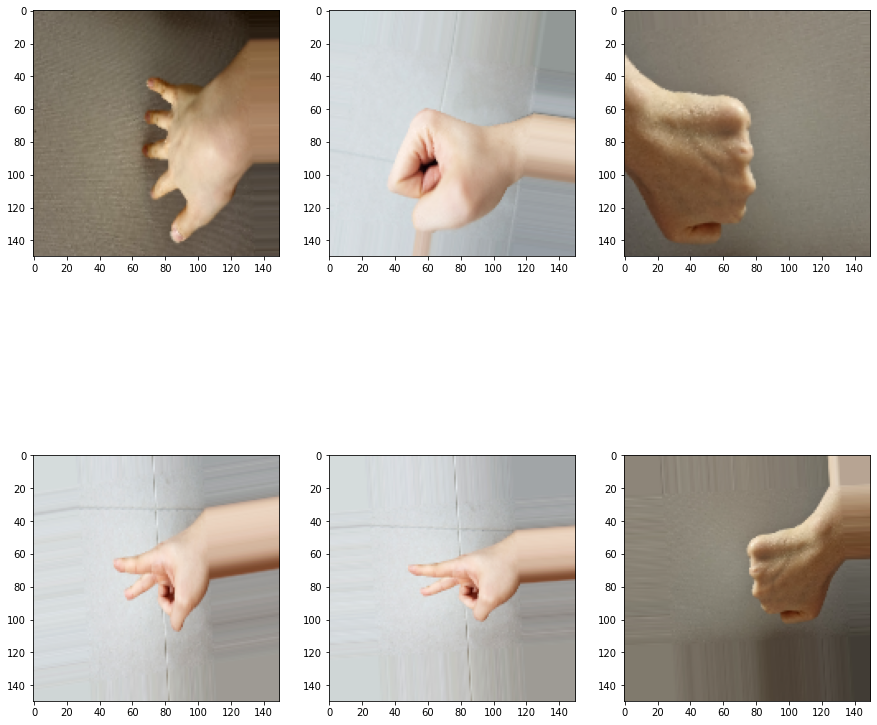

In [16]:
file_path = "./image_data/train_set"
rock_file = glob.glob(file_path+"/rock/*jpg")
paper_file = glob.glob(file_path+"/paper/*.jpg")
scissors_file = glob.glob(file_path+"/sciss/*jpg")

img_random=[]
img_random.append(random.choice(rock_file)) 
img_random.append(random.choice(rock_file)) 
img_random.append(random.choice(paper_file))
img_random.append(random.choice(paper_file))
img_random.append(random.choice(scissors_file))
img_random.append(random.choice(scissors_file))

x=[]
for i in range(6):
  tmp = image.load_img(img_random[i],target_size=(150,150))
  x.append(image.img_to_array(tmp))

x=np.array(x)


fig = plt.figure(figsize = (15,15))
grid = gridspec.GridSpec(nrows=2,ncols=3)
i=0
for img_batch in train_dgen.flow(x,batch_size=3):
  plt.subplot(grid[i])
  plt.imshow(image.array_to_img(img_batch[0]))
  i+=1
  if i % 6 == 0:
    break
plt.show()

In [18]:
for data_batch, labels_batch in train_gen:
  print("배치 데이터 크기:",data_batch.shape)
  print("배치 레이블 크기:",labels_batch.shape)
  break

배치 데이터 크기: (30, 150, 150, 3)
배치 레이블 크기: (30, 3)


In [19]:
history = model.fit_generator(
    train_gen,
    steps_per_epoch =30,
    epochs = 70,
    validation_data = val_gen,
    validation_steps=10,
    )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/70
30/30 [==============================] - 202s 6s/step - loss: 1.3455 - acc: 0.3233 - val_loss: 1.3193 - val_acc: 0.3900
Epoch 2/70
30/30 [==============================] - 188s 6s/step - loss: 1.3128 - acc: 0.3589 - val_loss: 1.3080 - val_acc: 0.3333
Epoch 3/70
30/30 [==============================] - 187s 6s/step - loss: 1.2892 - acc: 0.3656 - val_loss: 1.2738 - val_acc: 0.3600
Epoch 4/70
30/30 [==============================] - 186s 6s/step - loss: 1.2703 - acc: 0.3889 - val_loss: 1.2633 - val_acc: 0.5333
Epoch 5/70
30/30 [==============================] - 187s 6s/step - loss: 1.2437 - acc: 0.4267 - val_loss: 1.2420 - val_acc: 0.4233
Epoch 6/70
30/30 [==============================] - 186s 6s/step - loss: 1.2117 - acc: 0.4578 - val_loss: 1.1869 - val_acc: 0.4733
Epoch 7/70
30/30 [==============================] - 187s 6s/step - loss: 1.1874 - acc: 0.4922 - val_loss: 1.2210 - val_acc: 0.4200
Epoch 8/70
30/30 [==============================] - 186s 6s/step - loss: 1.1626 - a

#훈련과 검증 결과를 그래프로 나타내기

70 70


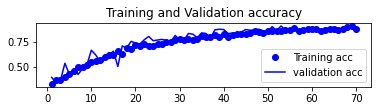

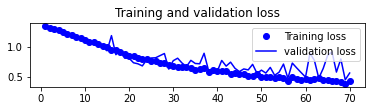

In [20]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(train_acc)+1)
print(len(train_acc),len(val_acc))

#정확도 그래프
plt.subplot(3,1,1)
plt.plot(epochs, train_acc, 'bo',label ="Training acc")
plt.plot(epochs, val_acc, 'b',label ="validation acc")
plt.title("Training and Validation accuracy")
plt.legend()

plt.figure()
#손실 그래프
plt.subplot(3,1,3)
plt.plot(epochs, train_loss, 'bo',label ="Training loss")
plt.plot(epochs, val_loss, 'b',label ="validation loss")
plt.title("Training and validation loss")
plt.legend()


plt.show()

#TEST 하기

In [22]:
test_gen = test_dgen.flow_from_directory(
    "./image_data/test_set",
    target_size = (150,150),
    batch_size = 30,
    class_mode ='categorical'
)

test_loss, test_acc = model.evaluate_generator(test_gen,steps = 10)
print("test_acc  :  ",test_acc)
print("test_loss :", test_loss)

Found 300 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


test_acc  :   0.8899999856948853
test_loss : 0.43730559945106506


#예측하기



1.   test gen에서 이미지와 label 추출
2.   8개의 이미지와 실제 값 출력
3.   예측
4.   8개의 이미지와 예측 값 출력
5.   결과 출력



모든 예측이 맞았습니다.


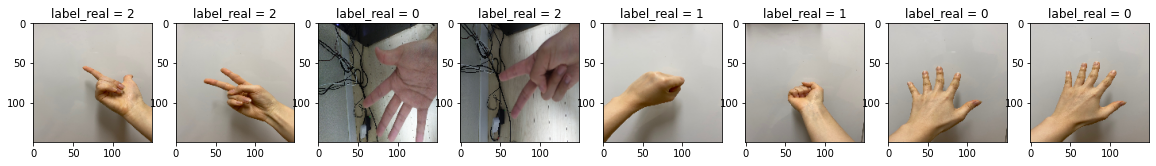

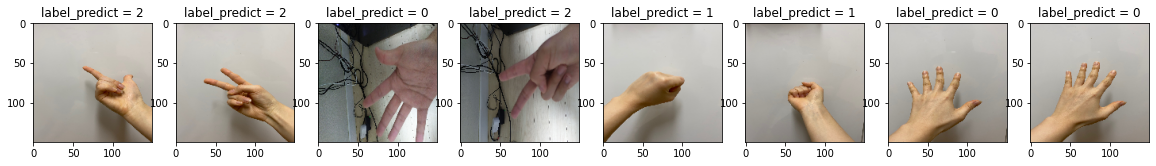

In [43]:
test_gen_img_label=test_gen
result_array =next(test_gen_img_label)
test_img=[]
test_label=[]
for i in range(8):
  y = i*3
  test_img.append(result_array[0][y])
  test_label.append(result_array[1][y])

fig = plt.figure(figsize = (20,20))
grid = gridspec.GridSpec(nrows=1,ncols=8)

for j in range(8):
  plt.subplot(grid[j])
  plt.imshow(image.array_to_img(test_img[j]))
  plt.title("label_real = "+str(test_label[j].argmax()))


fig = plt.figure(figsize = (20,20))
grid2 = gridspec.GridSpec(nrows=1, ncols=8)

test_img= np.array(test_img)
y_prob = model.predict(test_img) 
predict_result = y_prob.argmax(axis=-1)



for i in range(8):
  plt.subplot(grid2[i])
  plt.imshow(test_img[i])
  plt.title("label_predict = "+str(predict_result[i]))

for j in range(8):
  if predict_result[j] != test_label[j].argmax():
    print( j+1,"번째가 틀렸습니다.")
    break
  if j==7:
    print("모든 예측이 맞았습니다.")

In [44]:
for j in range(8):
   print("테스트 데이터에 대한 예측 : ",predict_result[j]," 각 데이터의 정답 : ",test_label[j].argmax())  
    

테스트 데이터에 대한 예측 :  2  각 데이터의 정답 :  2
테스트 데이터에 대한 예측 :  2  각 데이터의 정답 :  2
테스트 데이터에 대한 예측 :  0  각 데이터의 정답 :  0
테스트 데이터에 대한 예측 :  2  각 데이터의 정답 :  2
테스트 데이터에 대한 예측 :  1  각 데이터의 정답 :  1
테스트 데이터에 대한 예측 :  1  각 데이터의 정답 :  1
테스트 데이터에 대한 예측 :  0  각 데이터의 정답 :  0
테스트 데이터에 대한 예측 :  0  각 데이터의 정답 :  0
